In [1]:
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt


In [2]:
path_training_images = '/home/amiteshag320/Desktop/workingenv/my-project-env/WEEK3/train-images.idx3-ubyte'
path_training_labels = '/home/amiteshag320/Desktop/workingenv/my-project-env/WEEK3/train-labels.idx1-ubyte'

path_test_images = '/home/amiteshag320/Desktop/workingenv/my-project-env/WEEK3/t10k-images.idx3-ubyte'
path_test_labels = '/home/amiteshag320/Desktop/workingenv/my-project-env/WEEK3/t10k-labels.idx1-ubyte'



In [3]:
X_train, Y_train = loadlocal_mnist(path_training_images,path_training_labels)
X_test, Y_test = loadlocal_mnist(path_test_images, path_test_labels)



In [4]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
num_classes = 10 # from 0 to 9
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)
X_train.shape

(60000, 784)

In [7]:
model = Sequential()

model.add(Dense(units=256, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [22]:
model.compile(

  optimizer='adam',

  loss='categorical_crossentropy',

  metrics=['accuracy']

)

history = model.fit(

   x=X_train , y=Y_train,

    epochs=20,batch_size=128,validation_split=.1

    

)

Epoch 1/20
422/422 [==============================] - 6s 15ms/step - loss: 0.4687 - accuracy: 0.8590 - val_loss: 0.1325 - val_accuracy: 0.9628
Epoch 2/20
422/422 [==============================] - 6s 13ms/step - loss: 0.1815 - accuracy: 0.9473 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 3/20
422/422 [==============================] - 6s 15ms/step - loss: 0.1347 - accuracy: 0.9608 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 4/20
422/422 [==============================] - 6s 13ms/step - loss: 0.1068 - accuracy: 0.9685 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 5/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0923 - accuracy: 0.9730 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 6/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0686 - val_accuracy: 0.9802
Epoch 7/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0701 - val_accuracy: 0.9798

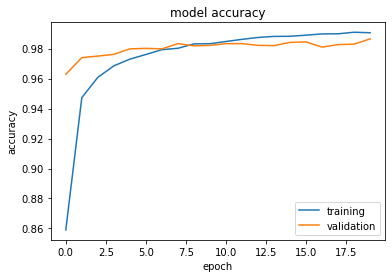

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


In [24]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 2s - loss: 0.0712 - accuracy: 0.9823
